# Tutorial on Classification I: Generative models

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F05_tutorial_classification_generative.ipynb)

Tutorial to the class [Classification I: Generative models](05_classification_generative.ipynb).

<div class="alert alert-block alert-success">
    <b>Context</b>
    
- Era5 data set: surface data at paris.
- Linear discriminant analysis

</div>

## Case Study : Prediction of the Rain

### Introduction

Prediction of the rain remains one of the most challenging task in numerical weather prediction. In fact the rain is the result of multiple scale phenomena: from the large-scale organization of weather system to the small scale microphysics of dropplet formation. Getting the right prediction for the rain implies that we have a model that captures well all these scales.

Despite the fact that rain is hard to predict, there seem to be exist a correspondance between the surface pressure and the weather conditions as shown in the picture below:

<img alt="Barometer" src="images/barometer.jpg">


### Dataset

The data we are going to use in this notebook comes from the [ERA5 data base](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels). To quote ECMWF: *Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using the laws of physics.* In the ERA5 data base, we can find 4d fields (time, latitude, longitude, height) such as temperature, wind, humidity, clouds, precipitation, etc... The time resolution is 1 hour, horizontal grid spacing is approx 20 km and vertical resolution varies with high resolution near the ground and coarse resolution near the top of the atmosphere.

To illustrate this notebook, I prepared a data set with surface variables only at a given location between 2000 and 2009 at the hourly resolution.

The variables in this data set are the raw variables that you can find in the ERA reanalysis

| Variable name  | Description                             | Unit    |
| :------------- | :-------------                          | :------ |
| t2m            | Air temperature at 2 m above the ground | [K]     |
| d2m            | [Dew point](https://en.wikipedia.org/wiki/Dew_point) at 2 m above the ground       | [K]     |
| u10            | Zonal wind component at 10 m            | [m/s]   |
| v10            | Meridional wind component at 10 m       | [m/s]   |
| skt            | Skin temperature                        | [K]     |
| tcc            | Total cloud cover                       | [0-1]   |
| sp             | Surface pressure                        | [Pa]    |
| tp             | Total precipitation                     | [m]     |
| ssrd           | Surface solar radiation (downwards)     | [J/m^2] |
| blh            | Boundary layer height                   | [m]     |


#### Reading the Data



In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
# Default colors
RC_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Matplotlib configuration
plt.rc('font', size=14)

In [2]:
df = pd.read_csv("data/era5_paris_sf_2000_2009.csv", index_col='time', parse_dates=True)

In [3]:
df.describe()

,skt,u10,v10,t2m,d2m,tcc,sp,tp,ssrd,blh
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,8.767200e+04,87672.000000
mean,283.811469,1.063173,0.542577,284.102522,280.603131,0.674363,100306.215302,0.000081,4.692709e+05,592.633676
std,7.282320,2.920556,3.055488,6.615780,5.536824,0.356627,946.710936,0.000285,7.169155e+05,436.894806
min,258.046500,-8.554123,-8.692932,260.682980,258.580700,0.000000,95585.560000,0.000000,-1.429965e-03,10.763875
25%,278.694565,-1.201481,-1.761349,279.443792,276.807730,0.383133,99755.795000,0.000000,0.000000e+00,215.325750
50%,283.566100,1.155563,0.384865,284.094120,281.082300,0.835373,100369.515000,0.000000,2.118400e+04,505.917295
75%,288.581330,3.045872,2.631916,288.708078,284.839027,0.996002,100914.701250,0.000000,7.436800e+05,898.669800
max,313.901800,14.185852,14.439499,309.334100,296.104550,1.000000,102814.060000,0.005638,3.233472e+06,2987.135000


#### Processing the Data

In this tutorial, we will be interested in the precipitation variable `tp`, the surface pressure `sp`, and the air temperature near the surface `t2m`. You can plot time series of these variables for the entire data set or for limited periods of time. Remember that you can use the index `df.loc` to select part of the dataset. For more advanced users, you can compute the seasonal cycle with `.groupby(df.index.month).mean()`
 
> ***Question***
> - Take a moment to explore this data set.

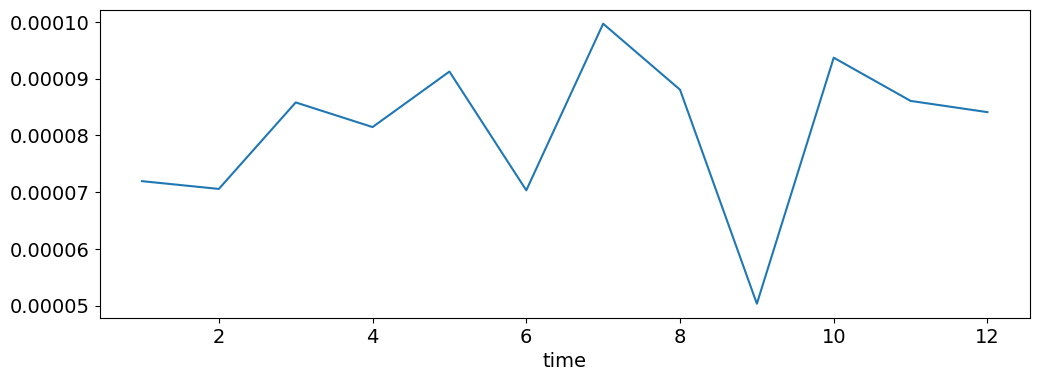

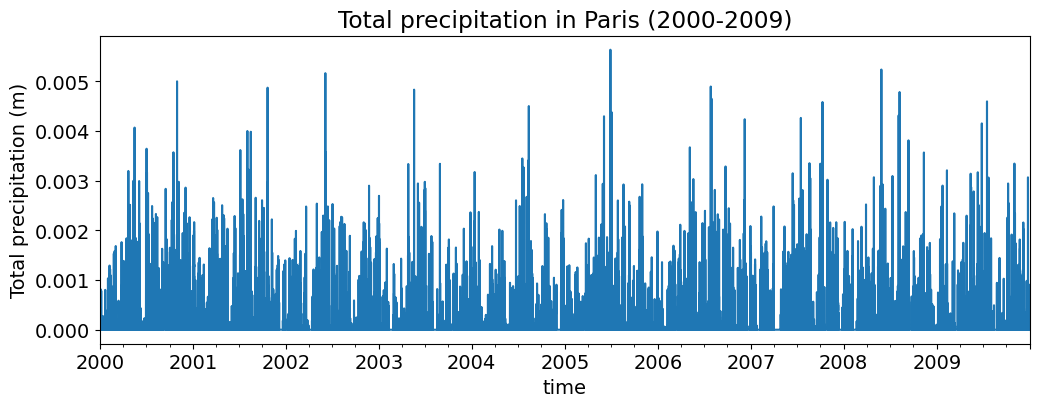

In [19]:
# Explore the data set here. 
# You can add more cells if needed.
plt.figure()
df['tp'].groupby(df.index.month).mean().plot(figsize=(12, 4))
plt.figure()
df['tp'].plot(figsize=(12, 4))
plt.ylabel('Total precipitation (m)')
plt.title('Total precipitation in Paris (2000-2009)')
plt.show()

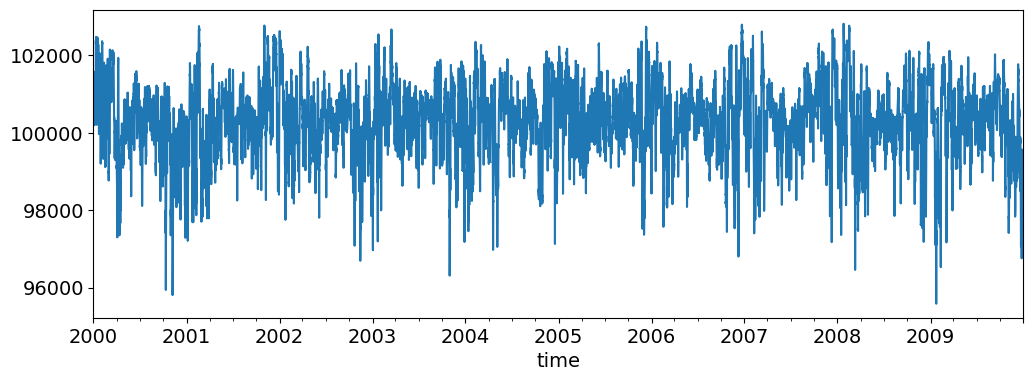

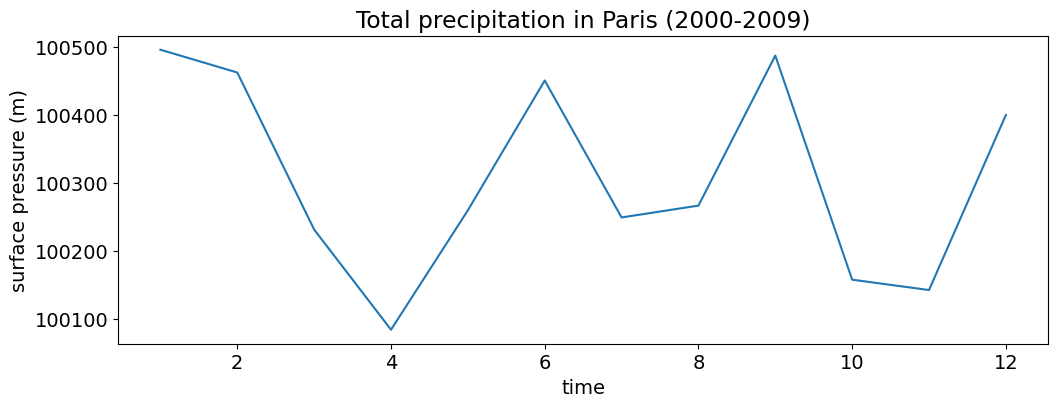

In [22]:
plt.figure()
df['sp'].plot(figsize=(12, 4))
plt.figure()
df['sp'].groupby(df.index.month).mean().plot(figsize=(12, 4))
plt.ylabel('surface pressure (m)')
plt.title('Total precipitation in Paris (2000-2009)')
plt.show()

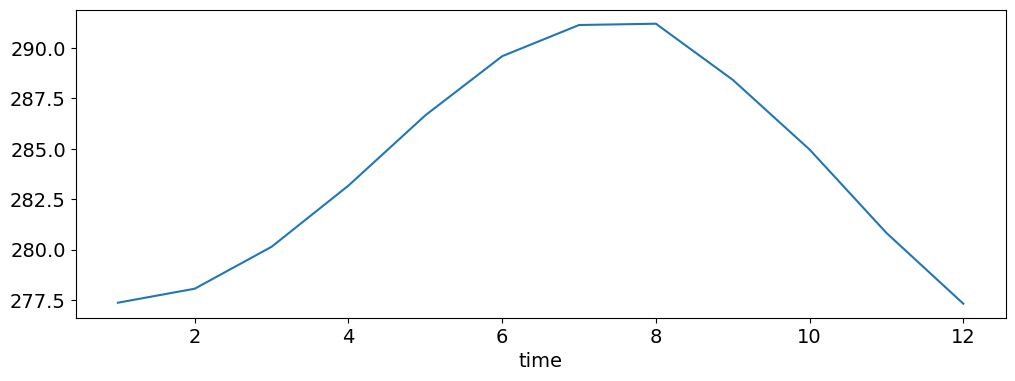

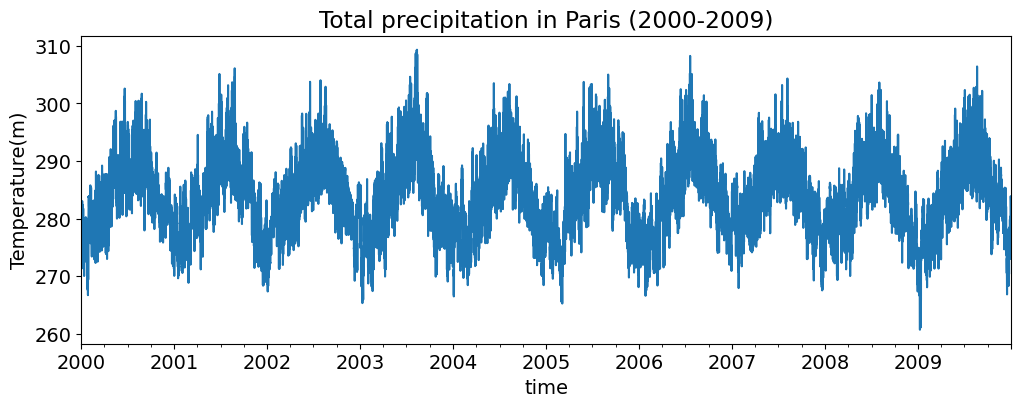

In [21]:
plt.figure()
df['t2m'].groupby(df.index.month).mean().plot(figsize=(12, 4))
plt.figure()
df['t2m'].plot(figsize=(12, 4))

plt.ylabel('Temperature(m)')
plt.title('Total precipitation in Paris (2000-2009)')
plt.show()

> ***Question (optional)***
> - Which variables exhibit a seasonal cycle? a daily cycle? Could you have anticipated this result?

***Your answer:***

> ***Question***
> - In the same figure, plot a time series of the total precipitation `tp` and surface pressure `sp`. You can plot this time series for a month in winter and a month in summer.
> - Do you observe any correlation between rain and pressure?

In [27]:
plt.scatter(df['sp'].loc[2002-1-1:2002-1-2],df['tp'].loc[2002-1-1:2002-1-2])

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [2000] of type int

As you can see (if you zoom enough),  rain is very noisy data set. Indeed, if you observe the rain pattern, it is often very localized. This is also the reason why it is very hard to predict. In order to smooth the data, we are going to work with daily sums.

> ***Question***
> - Use the `.resample` method to to get daily sums.

<Axes: xlabel='time'>

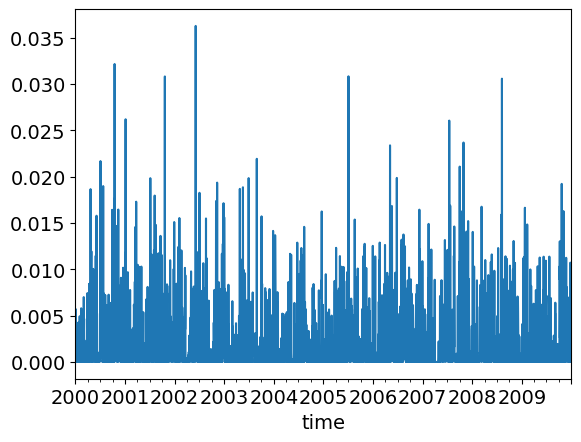

In [28]:
# your code here
df_day_dim = df.resample('D').sum()
plt.figure()
df_day_dim['tp'].plot()


> ***Question***
> - To avoid having to worry about the offset and the scale of the inputs, center them and normalize them by the standard deviation.

In [7]:
# your code here
# df_day = 

### Defining the Training Set

#### Defining the Classes and the Target Data

Let's classify the days into two classes: "Rain", "Dry". We use a threshold of $0.5$ mm/day. We assign a class tag of 1 for "Rain" and 0 for "Dry".

In [8]:
# Threshold: 0.5 mm/day
PRECIP_TH_DIM = 5.e-4

# Normalized threshold
precip_th = (PRECIP_TH_DIM - df_day_dim['tp'].mean()) / df_day_dim['tp'].std()
print('Rain/dry threshold [m/d]: {:.2e}'.format(PRECIP_TH_DIM))
print('Normalized rain/dry threshold:{:.2e}'.format(precip_th))

# Class labels dict for plots
CLASS_LABELS = {0: 'Dry', 1: 'Rain'}
label_classes = {v: k for k, v in CLASS_LABELS.items()}

# Create target variable
df_day['tag'] = df_day['tp'].where(df_day['tp'] < precip_th, label_classes['Rain'])
df_day['tag'] = df_day['tag'].where(df_day['tp'] >= precip_th, label_classes['Dry'])
df_day['tag'] = df_day['tag'].astype(int)

NameError: name 'df_day_dim' is not defined

> ***Question***
> - Use the function `plt.scatter` to plot a scatter plot of rain classification in the (pressure, temperature) space (`sp`, `t2m`). You need to adjust the color of the points so that we can see which category they belong to. Don't forget to add labels to your plot.

In [ ]:
# your code here

> ***Question***
> - Use the .boxplot method to plot the percentiles of the pressure distribution for the rainy days and dry days. Keyword arguments that could be useful here are `column` and `by` (and if you feel like designing it a bit: `patch_artist = True`).

In [ ]:
# your code here

Let's split our dataset into a training set and a testing set. For this tutorial, we will only keep surface pressure `sp` as our input feature. Uncomment the lines below to generate the training and testing data sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_day[['sp']], df_day['tag'],
    test_size=.3, random_state=0)

For now on, we will train our model an `X_train` and `y_train`. Later on, we will validate our results with `X_test` and `y_test`.

> ***Question***
> - What is the number of day in each class?
> - What is the probability of having a rainy day in this data set?

In [ ]:
# your code here

## Linear Discriminant Analysis Application

### From Scratch

In order to compute the linear discriminant analysis, we need to compute the mean and covariance matrix of each class

> ***Question***
> - What is the mean of each class? (Use the method `.groupby(y_train)`)

In [ ]:
# your code here

> ***Question***
> - What is the covariance matrix of each class? (Same hint)

In [ ]:
# your code here

> ***Question***
> - What is the weighted sum of the two covariance matrices

In [ ]:
# your code here

Suppose rain is only function of pressure.

> ***Question***
> - Compute the numerical coefficients of the two discriminant functions $\delta_k(x) = x\frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log P_k$

In [ ]:
# your code here

> ***Question***
> - What is the threshold pressure to discriminate between rainy days and dry days?

In [ ]:
# your code here

> ***Question (optional)***
> - Same question but in the 2d space (pressure, temperature)
> - Plot this decision boundary on top of your scatter plot

In [ ]:
# your code here

### With Scikit-Learn

> ***Question***
> - Use the `LinearDiscriminantAnalysis` classifier from `sklearn.discriminant_analysis` to fit the model using Scikit-Learn.

In [ ]:
# your code here

> ***Question***
> - What is the class prediction according to this Linear Discriminant Analysis?

In [ ]:
# your code here

> ***Question***
> - What is the overall accuracy of our predictor? You can use the `classification_report` function.

In [ ]:
from sklearn.metrics import classification_report

# your code here

> ***Question***
> - Look more closely at the results with the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

# your code here

> ***Question***
> - Do you get a completely different confusion matrix with the test data than with the train data?

In [ ]:
# your code here

> ***Question***
> - Do you feel you have built a good predictor? 
> - What would be the score of a predictor that would predict rain every day? dry every day? 
> - What about a completely random predictor?
> - What do you think of the [picture of the barometer](#Prediction-of-the-rain) at the beginning of this tutorial?

### Comparing LDA with QDA based on the ROC Curve

> ***Question (optional)***
> - Read about the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and try to use the scikit-learn module to plot it.
> - Does the Quadratic discriminant analysis performs better on this dataset?

In [ ]:
# your code here

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>